In [ ]:
!pip install researchpy
!pip install pyreadstat
!pip install pingouin
!git clone https://github.com/Rasstin/Experimental_Methods.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 5.3 MB/s 
     |████████████████████████████████| 9.9 MB 27.0 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196208 sha256=4cdad06c17ba9d1f0ea9b55c8d3be455c673a01ba5a2ee9e7907f2dcc4d24952
  Stored in directory: /root/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7049 sha256=44af77a27405ca968bb4b0b5327ddf119ef8ecb3918d5132c89cac3276867e1e
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninsta

fatal: destination path 'Experimental_Methods' already exists and is not an empty directory.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import researchpy as rp
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.multicomp as mc
from statsmodels.formula.api import ols

# Reading & Data Cleaning & EDA

In [ ]:
df = pd.read_spss("Experimental_Methods/Data Assignment 5 Beauty Stereotype.sav")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Profession  105 non-null    category
 1   stake       105 non-null    category
 2   Expert_G    105 non-null    category
 3   CV          105 non-null    category
 4   Order       105 non-null    category
 5   choice_cv   105 non-null    float64 
 6   Gender      101 non-null    category
 7   Age         100 non-null    float64 
 8   choice      105 non-null    float64 
dtypes: category(6), float64(3)
memory usage: 3.9 KB


In [ ]:
df.shape

(105, 9)

In [ ]:
df.head()

,Profession,stake,Expert_G,CV,Order,choice_cv,Gender,Age,choice
0,Doctor,low,male,92_attractive & 94_less attractive,Left_92&Right_94,5.0,Female,20.0,5.0
1,Doctor,low,female,92_attractive & 94_less attractive,Left_92&Right_94,2.0,Male,20.0,8.0
2,Doctor,low,male,92_attractive & 94_less attractive,Left_92&Right_94,9.0,Male,21.0,1.0
3,Doctor,low,female,92_attractive & 94_less attractive,Left_92&Right_94,4.0,Female,20.0,6.0
4,Doctor,low,female,92_attractive & 94_less attractive,Left_92&Right_94,3.0,Male,19.0,7.0


In [ ]:
df.CV = df.CV.str.split('&').apply(lambda x : x[0])

In [ ]:
df.nunique()

Profession    2
stake         2
Expert_G      2
CV            2
Order         2
choice_cv     9
Gender        2
Age           5
choice        9
dtype: int64

In [ ]:
df.CV.value_counts()

92_less attractuve     54
92_attractive          51
Name: CV, dtype: int64

In [ ]:
df.Age.value_counts()

20.0    41
19.0    30
21.0    21
22.0     7
18.0     1
Name: Age, dtype: int64

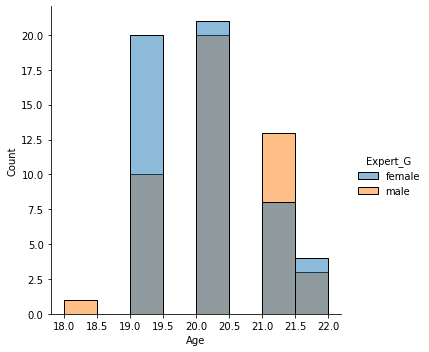

In [ ]:
sns.displot(data = df , x ='Age',hue='Expert_G')

In [ ]:
df.Age.mean() , df.Age.std(), df.Gender.value_counts()

(20.03, 0.9151364638537509, Male      54
 Female    47
 Name: Gender, dtype: int64)

In [ ]:
47/(47+54) , 47+54

(0.46534653465346537, 101)

In [ ]:
x = ['Profession','stake']
# xq = ['Profession','stake','CV']
y = 'choice'
formula = 'choice ~ C(Profession) + C(stake) + C(Profession):C(stake)'
formulaq = 'choice ~ C(Profession) + C(stake) '

In [ ]:
report = rp.summary_cont(df.groupby(x[0]),decimals=3)[y]


report['95% Conf.Interval'] = report.apply(lambda x : [x['95% Conf.'] , x['Interval']], axis =1 )

report = report.drop(columns=['95% Conf.' , 'Interval'])

report.style.background_gradient(subset= report.columns[1:-1] ,vmin = 0)

,N,Mean,SD,SE,95% Conf.Interval
Profession,,,,,
Doctor,46,4.196000,2.911000,0.429000,"[3.331, 5.06]"
Lawyer,59,5.661000,2.502000,0.326000,"[5.009, 6.313]"


In [ ]:
report = rp.summary_cont(df.groupby(x[1]),decimals=3)[y]

report

report['95% Conf.Interval'] = report.apply(lambda x : [x['95% Conf.'] , x['Interval']], axis =1 )

report = report.drop(columns=['95% Conf.' , 'Interval'])

report.style.background_gradient(subset= report.columns[1:-1] ,vmin = 0)

,N,Mean,SD,SE,95% Conf.Interval
stake,,,,,
high,51,4.961000,2.966000,0.415000,"[4.127, 5.795]"
low,54,5.074000,2.605000,0.355000,"[4.363, 5.785]"


In [ ]:
report = rp.summary_cont(df.groupby(x),decimals=3)[y]

# report

report['95% Conf.Interval'] = report.apply(lambda x : [x['95% Conf.'] , x['Interval']], axis =1 )

report = report.drop(columns=['95% Conf.' , 'Interval'])

report.style.background_gradient(subset= report.columns[1:-1] ,vmin = 0)

In [ ]:
stats.describe(df.choice)

DescribeResult(nobs=105, minmax=(1.0, 9.0), mean=5.019047619047619, variance=7.69194139194139, skewness=-0.09859950232349496, kurtosis=-1.3718779869695568)

# Question 1

### Normality Assumption

In [ ]:
df['residuals'] = df[y] -  df.groupby(x)[y].transform('mean')

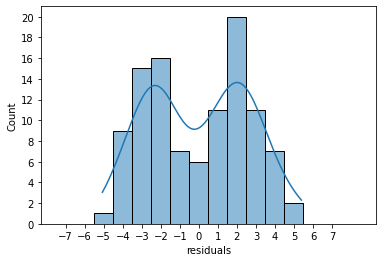

In [ ]:
sns.histplot(data =df, x = 'residuals' ,kde = True,  binwidth=1  ,binrange=[-7.5,8.5])
plt.xticks(range(-7,8,1))
plt.yticks(range(0,21,2))
plt.show()

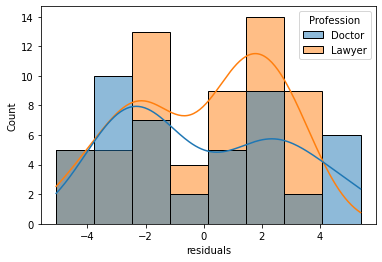

In [ ]:
sns.histplot(data =df, x = 'residuals' ,kde = True,hue = x[0],)
# plt.xticks(range(1,10))

plt.show()

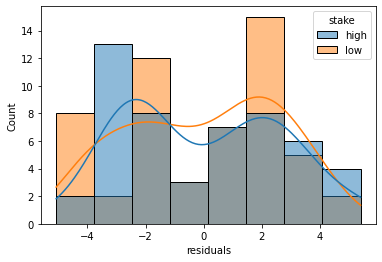

In [ ]:
sns.histplot(data =df, x = 'residuals' ,kde = True,hue = x[1],)
# plt.xticks(range(1,10))

plt.show()

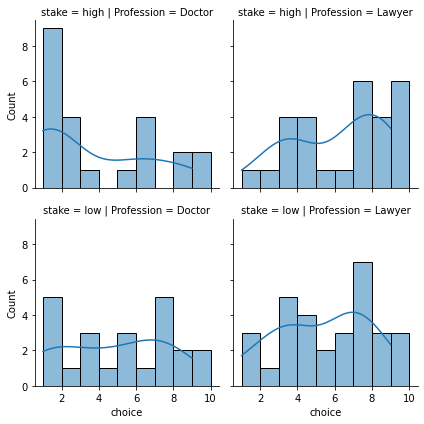

In [ ]:
g = sns.FacetGrid(df, col = x[0],row=x[1])
g.map(sns.histplot, y,kde = True,binwidth=1,binrange=(1,10))

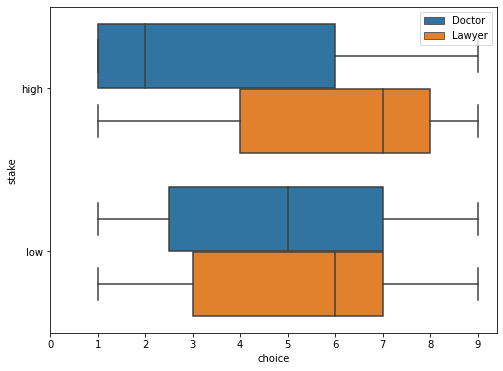

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data = df, x = y , y = x[1], hue=x[0])
plt.xticks(range(0,10,1))
plt.legend(loc=1)
plt.show()

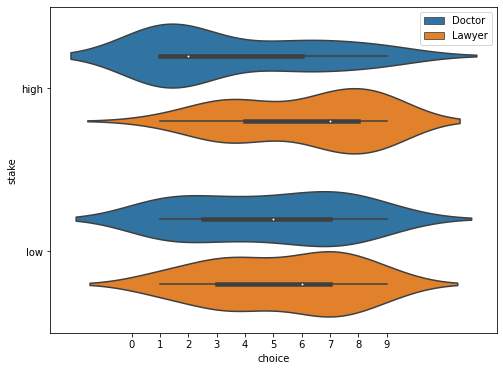

In [ ]:
plt.figure(figsize=(8,6))
sns.violinplot(data = df, x = y , y = x[1], hue=x[0])
plt.xticks(range(0,10,1))
plt.legend(loc=1)
plt.show()

Text(0, 0.5, 'Ordred Values of Residuals')

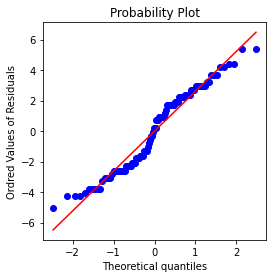

In [ ]:

fig, (ax) = plt.subplots(figsize = (4,4))
res = stats.probplot(df['residuals'],dist='norm', plot=ax)
plt.ylabel('Ordred Values of Residuals')

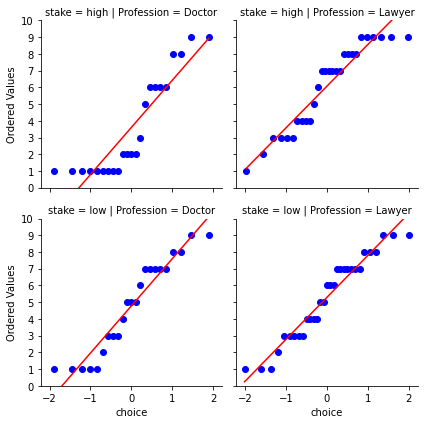

In [ ]:
def qqplot_new(x, ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()
#     sm.qqplot(x, ax=ax, **kwargs)
    stats.probplot(x, plot=ax)
    plt.yticks(range(0,11))
    plt.ylim((0,10))
    
    
g = sns.FacetGrid(df, col=x[0], row = x[1],)
# g.map(qqplot_new, "prob", line='s')
g.map(qqplot_new, y,dist='norm')
# g.set_xlabel('axes label 1')
# g.axes[0,0].set_xlabel('axes label 1')



In [ ]:
tmp = df.groupby(x)[y].apply(stats.describe)
tmp.iloc[0] , tmp.iloc[1] , tmp.iloc[2] , tmp.iloc[3] 

(DescribeResult(nobs=23, minmax=(1.0, 9.0), mean=3.608695652173913, variance=8.794466403162055, skewness=0.6477772881068323, kurtosis=-1.149575558641586),
 DescribeResult(nobs=23, minmax=(1.0, 9.0), mean=4.782608695652174, variance=7.814229249011858, skewness=-0.07797101916167953, kurtosis=-1.377899332459859),
 DescribeResult(nobs=28, minmax=(1.0, 9.0), mean=6.071428571428571, variance=6.291005291005291, skewness=-0.39776624072944083, kurtosis=-1.1867928678996775),
 DescribeResult(nobs=31, minmax=(1.0, 9.0), mean=5.290322580645161, variance=6.146236559139784, skewness=-0.20537133128463964, kurtosis=-1.1100341521056627))

In [ ]:
statistics = df.groupby(x)[y].apply(stats.describe).apply(pd.Series)
statistics.columns = ['nobs' , 'minmax','mean','variance','skewness','kurtosis']
statistics.round(3).style.bar(subset = statistics.columns[2:], align = "mid", color = ["salmon", "lightgreen"]).set_precision(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
stats.normaltest(df.residuals)

NormaltestResult(statistic=31.124260702885515, pvalue=1.7436232913970671e-07)

In [ ]:
df.groupby(x)[y].apply(stats.normaltest)

Profession  stake
Doctor      high         (5.0888788826385, 0.0785170530626555)
            low      (6.736880399223209, 0.034443320169520196)
Lawyer      high     (5.5793919687521605, 0.06143988976240125)
            low       (4.306063549371835, 0.11613153885330285)
Name: choice, dtype: object

In [ ]:
stats.shapiro(df.residuals,)

ShapiroResult(statistic=0.9532669186592102, pvalue=0.0009869515197351575)

In [ ]:
df.groupby(x)[y].apply(stats.shapiro)

Profession  stake
Doctor      high     (0.8015686273574829, 0.000405993836466223)
            low       (0.9036179780960083, 0.03003600239753723)
Lawyer      high     (0.8941155076026917, 0.008352658711373806)
            low       (0.9330523610115051, 0.05311787128448486)
Name: choice, dtype: object

In [ ]:
df['z_score'] = df.groupby(x)[y].transform(stats.zscore , ddof=1)

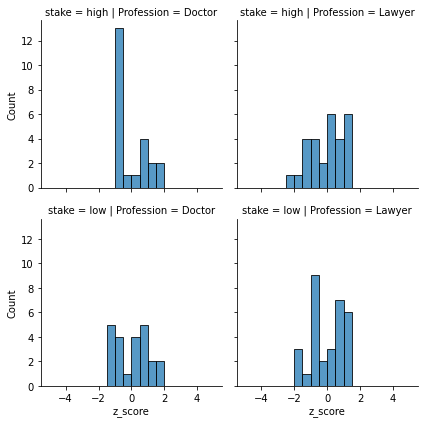

In [ ]:
g = sns.FacetGrid(df, col=x[0], row = x[1])

g.map(sns.histplot, 'z_score',binwidth = 0.5, binrange = ( -5 ,5 ))


In [ ]:
df['outlier'] = df.z_score.abs()> 3

In [ ]:
def color_boolean(val):
    color =''
    if val == True:
        color = 'red'
    elif val == False:
        color = 'green'
    return 'background-color: %s' % color

In [ ]:
df.style.applymap(color_boolean, subset=['outlier']).\
bar(subset = ["z_score"], align = "mid", color = ["salmon", "lightgreen"])


,Profession,stake,Expert_G,CV,Order,choice_cv,Gender,Age,choice,residuals,z_score,outlier
0,Doctor,low,male,92_attractive,Left_92&Right_94,5.000000,Female,20.000000,5.000000,0.217391,0.077768,False
1,Doctor,low,female,92_attractive,Left_92&Right_94,2.000000,Male,20.000000,8.000000,3.217391,1.150962,False
2,Doctor,low,male,92_attractive,Left_92&Right_94,9.000000,Male,21.000000,1.000000,-3.782609,-1.353157,False
3,Doctor,low,female,92_attractive,Left_92&Right_94,4.000000,Female,20.000000,6.000000,1.217391,0.435499,False
4,Doctor,low,female,92_attractive,Left_92&Right_94,3.000000,Male,19.000000,7.000000,2.217391,0.793230,False
5,Doctor,low,male,92_attractive,Left_92&Right_94,3.000000,Female,21.000000,7.000000,2.217391,0.793230,False
6,Doctor,low,female,92_attractive,Right_92&Left_94,5.000000,Male,21.000000,5.000000,0.217391,0.077768,False
7,Doctor,low,male,92_attractive,Right_92&Left_94,5.000000,Male,19.000000,5.000000,0.217391,0.077768,False
8,Doctor,low,male,92_attractive,Right_92&Left_94,7.000000,Male,20.000000,3.000000,-1.782609,-0.637695,False
9,Doctor,low,female,92_attractive,Right_92&Left_94,9.000000,Female,21.000000,1.000000,-3.782609,-1.353157,False


###  Levene's test for hetrogeneity of variances

In [ ]:
groups = df.groupby(x)[y].apply(lambda t : t.to_list())

In [ ]:
groups

Profession  stake
Doctor      high     [5.0, 6.0, 8.0, 1.0, 6.0, 8.0, 1.0, 3.0, 1.0, ...
            low      [5.0, 8.0, 1.0, 6.0, 7.0, 7.0, 5.0, 5.0, 3.0, ...
Lawyer      high     [7.0, 7.0, 7.0, 9.0, 1.0, 3.0, 3.0, 4.0, 9.0, ...
            low      [6.0, 6.0, 7.0, 3.0, 4.0, 4.0, 8.0, 3.0, 2.0, ...
Name: choice, dtype: object

In [ ]:
stats.levene(*groups,center = 'mean')

LeveneResult(statistic=0.9451069065023596, pvalue=0.4218552321007767)

# Question 2

## Two-way Anova

In [ ]:
stats.f_oneway(*groups,)

F_onewayResult(statistic=3.7579033382171243, pvalue=0.013218374740462287)

In [ ]:
df.columns

Index(['Profession', 'stake', 'Expert_G', 'CV', 'Order', 'choice_cv', 'Gender',
       'Age', 'choice', 'residuals', 'z_score', 'outlier'],
      dtype='object')

In [ ]:
# Ordinary Least Squares (OLS) model
model = ols(formula , data=df,)
fitted_model = model.fit(cov_type='HC3')
anova_table = sm.stats.anova_lm(fitted_model,type=1,robust = 'HC3')
anova_table.fillna("")

,df,sum_sq,mean_sq,F,PR(>F)
C(Profession),1.0,55.502435,55.502435,7.789701,0.006284
C(stake),1.0,0.153899,0.153899,0.021599,0.883451
C(Profession):C(stake),1.0,24.670027,24.670027,3.462409,0.065688
Residual,101.0,719.635544,7.125104,,


In [ ]:
# Ordinary Least Squares (OLS) model
model = ols(formulaq , data=df,)
fitted_model = model.fit(cov_type='HC3')
anova_table = sm.stats.anova_lm(fitted_model,type=2,robust = 'HC3')
anova_table.fillna("")

,df,sum_sq,mean_sq,F,PR(>F)
C(Profession),1.0,55.502435,55.502435,7.606081,0.006895
C(stake),1.0,0.153899,0.153899,0.02109,0.88482
Residual,102.0,744.305571,7.297113,,


In [ ]:
# fitted_model.summary()

In [ ]:
# sm.stats.anova_oneway(df[y],df[x[0]].str.cat(df[x[1]] ),use_var='unequal')


In [ ]:
import pingouin as pg
aov = pg.anova(df, dv=y, between=x, detailed=True,ss_type=1)
aov.fillna("")

,Source,SS,DF,MS,F,p-unc,np2
0,Profession,55.502435,1.0,55.502435,7.789701,0.006284,0.071603
1,stake,0.153899,1.0,0.153899,0.021599,0.883451,0.000214
2,Profession * stake,24.670027,1.0,24.670027,3.462409,0.065688,0.033145
3,Residual,719.635544,101.0,7.125104,,,


In [ ]:
import pingouin as pg
aov = pg.anova(df, dv=y, between=x, detailed=True,ss_type=2)
aov.fillna("")

,Source,SS,DF,MS,F,p-unc,np2
0,Profession,55.319702,1.0,55.319702,7.764055,0.006367,0.071384
1,stake,0.153899,1.0,0.153899,0.021599,0.883451,0.000214
2,Profession * stake,24.670027,1.0,24.670027,3.462409,0.065688,0.033145
3,Residual,719.635544,101.0,7.125104,,,


In [ ]:
import pingouin as pg
aov = pg.anova(df, dv=y, between=x, detailed=True,ss_type=3)
aov.fillna("")

,Source,SS,DF,MS,F,p-unc,np2
0,Profession,56.952291,1.0,56.952291,7.993187,0.005662,0.073337
1,stake,0.995924,1.0,0.995924,0.139777,0.709287,0.001382
2,Profession * stake,24.670027,1.0,24.670027,3.462409,0.065688,0.033145
3,Residual,719.635544,101.0,7.125104,,,


##  T-Tests ( Weltch Robustness Check) 

In [ ]:
report.style.background_gradient(subset= report.columns[1:-1] ,vmin = 0)

In [ ]:
groups

Profession  stake
Doctor      high     [5.0, 6.0, 8.0, 1.0, 6.0, 8.0, 1.0, 3.0, 1.0, ...
            low      [5.0, 8.0, 1.0, 6.0, 7.0, 7.0, 5.0, 5.0, 3.0, ...
Lawyer      high     [7.0, 7.0, 7.0, 9.0, 1.0, 3.0, 3.0, 4.0, 9.0, ...
            low      [6.0, 6.0, 7.0, 3.0, 4.0, 4.0, 8.0, 3.0, 2.0, ...
Name: choice, dtype: object

In [ ]:
stats.ttest_ind(groups[0] , groups[1], equal_var= False)

Ttest_indResult(statistic=-1.3814401772609572, pvalue=0.17414302442461185)

In [ ]:
stats.ttest_ind(groups[2] , groups[3], equal_var= False)

Ttest_indResult(statistic=1.2010699476591782, pvalue=0.23475692206714072)

In [ ]:
stats.ttest_ind(groups[0] , groups[2], equal_var= False)

Ttest_indResult(statistic=-3.1608668760856142, pvalue=0.002870769886382993)

In [ ]:
stats.ttest_ind(groups[1] , groups[3], equal_var= False)

Ttest_indResult(statistic=-0.6921845990175578, pvalue=0.4924464608051413)

In [ ]:
stats.ttest_ind(groups[0] + groups[1] , groups[2] + groups[3], equal_var= False )

Ttest_indResult(statistic=-2.719631816757295, pvalue=0.007859491429191616)

In [ ]:
stats.ttest_ind(groups[0] + groups[2] , groups[1] + groups[3] , equal_var= False)

Ttest_indResult(statistic=-0.20746086512850317, pvalue=0.8360737683241032)

In [ ]:
# stats.levene(groups[0] + groups[1] , groups[2] + groups[3])

In [ ]:
df2 = df.copy()
df2[x[1]] = df2[x[1]].replace(['high','low'],[1,0]).astype(int)

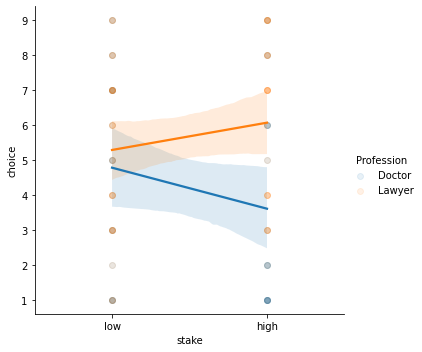

In [ ]:
sns.lmplot(data = df2 ,y = y , x = x[1],hue = x[0], scatter_kws={'alpha':0.1})
plt.yticks(range(1,10))
plt.xticks(range(0,2),labels=['low','high'])
plt.xlim([-0.5,1.5])

plt.show()

# Q3 Post-hoc Analysis

###  Tukey

In [ ]:
group_list = df[x[0]].str.cat(df[x[1]],'-')
sorted(group_list.unique())

['Doctor-high', 'Doctor-low', 'Lawyer-high', 'Lawyer-low']

In [ ]:


comp = mc.MultiComparison(df[y], group_list ) 
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Doctor-high,Doctor-low,1.1739,0.4478,-0.8824,3.2303,False
Doctor-high,Lawyer-high,2.4627,0.0077,0.5003,4.4251,True
Doctor-high,Lawyer-low,1.6816,0.1075,-0.2375,3.6007,False
Doctor-low,Lawyer-high,1.2888,0.321,-0.6736,3.2512,False
Doctor-low,Lawyer-low,0.5077,0.8971,-1.4114,2.4268,False
Lawyer-high,Lawyer-low,-0.7811,0.6567,-2.5992,1.037,False


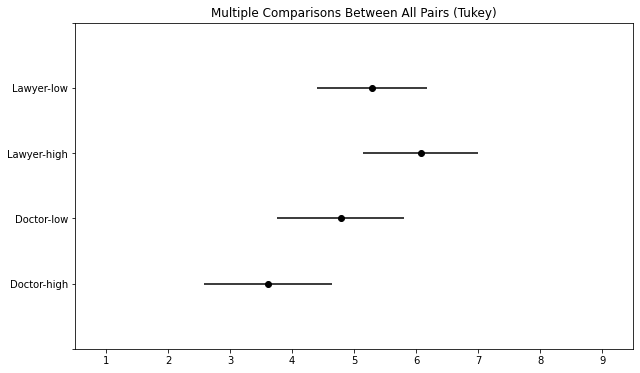

In [ ]:
post_hoc_res.plot_simultaneous()
plt.xticks(range(0,11))
plt.xlim([0.5,9.5])
plt.show()

In [ ]:
!jupyter nbconvert --to webpdf --allow-chromium-download MostafaSayyahi_A5_Code.ipynb

usage: jupyter-nbconvert [-h] [--debug] [--show-config] [--show-config-json]
                         [--generate-config] [-y] [--execute] [--allow-errors]
                         [--stdin] [--stdout] [--inplace] [--clear-output]
                         [--no-prompt] [--no-input]
                         [--log-level NbConvertApp.log_level]
                         [--config NbConvertApp.config_file]
                         [--to NbConvertApp.export_format]
                         [--template TemplateExporter.template_file]
                         [--writer NbConvertApp.writer_class]
                         [--post NbConvertApp.postprocessor_class]
                         [--output NbConvertApp.output_base]
                         [--output-dir FilesWriter.build_directory]
                         [--reveal-prefix SlidesExporter.reveal_url_prefix]
                         [--nbformat NotebookExporter.nbformat_version]
                         [extra_args [extra_args ...]]
jupyt